In [45]:
import pandas as pd
from pandas import DataFrame
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as ptr
from sklearn import preprocessing


In [87]:
dia= datasets.load_diabetes()

data= DataFrame(data= dia.data, columns= dia.feature_names)

data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [97]:
sse= []

k= range(1, 11)

for i in k:
    model= KMeans(n_clusters= i)
    model.fit_predict(data[['age', 'bmi']])
    error= model.inertia_
    sse.append(error)

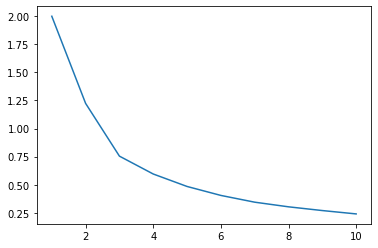

In [98]:
ptr.plot(k, sse)

In [99]:
#2 is a optimal value for K using elbow method

model= KMeans(n_clusters= 3)

clusters= model.fit_predict(data[['age', 'bmi']])
data['cluster']= clusters

In [100]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,cluster
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,2
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,1
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,0


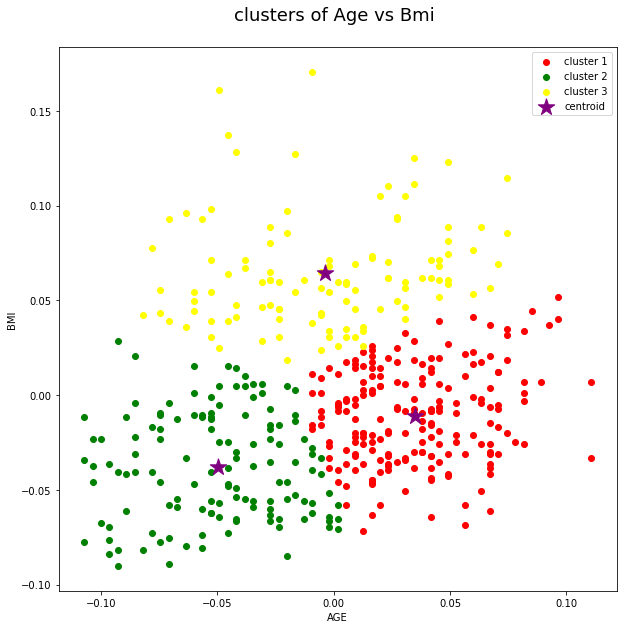

In [121]:
#visualize
d0= data[data.cluster==0]
d1= data[data.cluster==1]
d2= data[data.cluster==2]

ptr.figure(figsize= (10, 10))


ptr.title('clusters of Age vs Bmi \n', fontsize= 18)

ptr.xlabel('AGE', fontsize= 10)
ptr.ylabel('BMI', fontsize= 10)

ptr.scatter(d0['age'], d0['bmi'], color= "red")

ptr.scatter(d1['age'], d1['bmi'], color= "green")

ptr.scatter(d2['age'], d2['bmi'], color= "yellow")

#Lets plot the centoids too

centroid= model.cluster_centers_

ptr.scatter(centroid[:, 0], centroid[:, 1], marker= "*", color= "purple", s= 300)

ptr.legend(['cluster 1', 'cluster 2', 'cluster 3', 'centroid'])

ptr.show()
